In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from osprey.config import Config

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Get Trial Databases

In [3]:
config = Config('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-2/alpha_angle.yaml')
df1 = config.trial_results()
df1['strategy'] = 'fixed'
config = Config('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-CSE/alpha_angle.yaml')
df2 = config.trial_results()
df2['strategy'] = 'csp'


# df1 = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-GMRQ-CSE/cse_trials_0-159.pickl')
# df2 = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-GMRQ-CSE/cse_trials_160-end.pickl')
df = pd.concat([df1, df2])
df.to_pickle('Random-var-all.pickl')

Loading config file:     /Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-2/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     /Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-CSE/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [4]:
print(df.shape)
df.head()
df.rename(columns={'project_name': 'feature'}, inplace=True)
df.columns


(6819, 18)


Index(['completed', 'config_sha1', 'elapsed', 'host', 'id', 'mean_test_score',
       'mean_train_score', 'n_test_samples', 'n_train_samples', 'parameters',
       'feature', 'started', 'status', 'test_scores', 'traceback',
       'train_scores', 'user', 'strategy'],
      dtype='object')

In [5]:
df = df.loc[:,['id', 'feature', 'parameters', 'test_scores', 'train_scores', 'strategy']]
df.shape

(6819, 6)

In [6]:
df.reset_index(inplace=True, drop=True)
df.sort_index()

,id,feature,parameters,test_scores,train_scores,strategy
0,1,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.977152429810875, 2.9909674944247566, 2.9662...","[2.988860204149737, 2.9987766501032995, 2.9960...",fixed
1,2,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.953804573511941, 2.946792661204334, 2.97513...","[2.9998938576712026, 2.9995053860291425, 2.999...",fixed
2,3,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.9896072802469207, 2.7900464723106633, 2.997...","[2.999816341015027, 2.994605618457376, 2.99977...",fixed
3,4,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.9746196809816787, 2.9806604040291518, 2.892...","[2.999655835689648, 2.99996471637393, 2.999711...",fixed
4,5,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.9787622984525073, 2.950281301722762, 2.9654...","[2.998880342228884, 2.9995641203003856, 2.9995...",fixed
5,6,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.9906312652722096, 2.9667600620811183, 2.990...","[2.999582148884225, 2.9999638011144265, 2.9979...",fixed
6,7,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.958370022410409, 2.9956106638508615, 2.9601...","[2.9998318846815804, 2.9998498199704735, 2.999...",fixed
7,8,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.87212283184966, 2.971220781209908, 2.950344...","[2.998977337824213, 2.999876657788278, 2.99991...",fixed
8,9,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.5096001462032214, 2.9969915746027076, 2.979...","[2.9995731132902526, 2.9997609617065595, 2.999...",fixed
9,10,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__verbose': ...","[2.955601702506344, 2.989656463436264, 2.93276...","[2.996175908876496, 2.9991231508706537, 2.9997...",fixed


## Locate errors

In [7]:
def has_error(x):
    return np.any(np.isnan(x))

In [8]:
df['error'] = (df['test_scores'].apply(has_error) | df['train_scores'].apply(has_error))


In [9]:
print(df.shape)
df = df.loc[~df['error'], :]
del df['error']
print(df.shape)

(6819, 7)
(6819, 6)


## Extract optimized parameters

In [10]:
params = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time', 'variance_cut__threshold']
for param in params:
    df[param] = df.loc[:, 'parameters'].apply(lambda x: x[param])

In [11]:
df.drop(labels='parameters', axis=1, inplace=True)
df.sort_values(inplace=True, by='id', axis=0)

In [12]:
df.head()

,id,feature,test_scores,train_scores,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold
0,1,alpha_angle,"[2.977152429810875, 2.9909674944247566, 2.9662...","[2.988860204149737, 2.9987766501032995, 2.9960...",fixed,379,1,21,0.020604
3370,1,phi_tor,"[1.9931293610549723, 1.6596306542609995, 1.659...","[1.9997415528003564, 1.6691530779473576, 1.999...",csp,184,2,101,0.008936
1,2,alpha_angle,"[2.953804573511941, 2.946792661204334, 2.97513...","[2.9998938576712026, 2.9995053860291425, 2.999...",fixed,725,10,203,0.001783
3371,2,phi_tor,"[1.1459897604308367, 2.937507577135442, 5.3867...","[1.9999453239587655, 2.995194326071413, 6.9593...",csp,323,7,110,0.000766
2,3,alpha_angle,"[2.9896072802469207, 2.7900464723106633, 2.997...","[2.999816341015027, 2.994605618457376, 2.99977...",fixed,221,4,246,0.000169


In [13]:
df.loc[:,['id','feature', 'test_scores', 'strategy']].to_pickle('original_scores.pickl')

## Remove duplicates
Apparently Osprey *can* produce duplicates

In [14]:
before = df.groupby(['strategy', 'feature'])['id'].aggregate(np.size)
subset = ['feature', 'strategy'] + params
df.drop_duplicates(subset=subset, inplace=True)
after = df.groupby(['strategy', 'feature'])['id'].aggregate(np.size)

In [15]:
before = pd.DataFrame(before.reset_index())
after = pd.DataFrame(after.reset_index())



In [16]:
loss = before.merge(after, on=['strategy', 'feature'], how='outer')

loss['loss'] = loss['id_x'] - loss['id_y']

In [17]:
loss.sort_values(by='loss', ascending=False)

,strategy,feature,id_x,id_y,loss
13,fixed,pp_tor,495,180,315
2,csp,omega_tor,552,277,275
5,csp,pp_tor,404,161,243
11,fixed,phi-o_tor,405,347,58
6,csp,psi-o_tor,423,366,57
3,csp,phi-o_tor,416,360,56
10,fixed,omega_tor,400,349,51
4,csp,phi_tor,414,375,39
14,fixed,psi-o_tor,412,373,39
0,csp,alpha_angle,415,395,20


## Calculate mean and error score 


In [18]:
from sklearn.utils import resample
def safe_mean(x):
    try:
        return np.array(x).mean()
    except TypeError:
        return np.nan

def safe_error(x):
    try:
        n = int(1e3)
        alpha = 0.95
        x_bs = resample(x, n_samples=n)
        x_bs = np.sort(x_bs)
        low_ci = x_bs[int(n*(1 - alpha)/2.0)]
        high_ci = x_bs[int(n*(alpha+((1-alpha)/2.0)))]
        return (low_ci, high_ci)
    except TypeError:
        return np.nan


In [19]:
# Note - this assumes that the folds are all the same size.  This is fine for DHFR as all trajectories are 1000 ns long. 

observables = ['test_scores']

for observable in observables:
#         df[observable+'_error'] = df.loc[:, observable].apply(safe_error)
        df[observable+'_mean'] = df.loc[:, observable].apply(safe_mean)

In [20]:
df.drop(labels=['test_scores', 'train_scores'], axis=1, inplace=True)

In [21]:
df.head()

,id,feature,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,test_scores_mean
0,1,alpha_angle,fixed,379,1,21,0.020604,2.842569
3370,1,phi_tor,csp,184,2,101,0.008936,1.793257
1,2,alpha_angle,fixed,725,10,203,0.001783,2.954952
3371,2,phi_tor,csp,323,7,110,0.000766,3.053814
2,3,alpha_angle,fixed,221,4,246,0.000169,2.943055


## Generate ranks

In [22]:
df_rank = df.loc[:, ['strategy','test_scores_mean']].groupby('strategy').rank(method='average', ascending=False)
df_rank.columns = ['rank']

In [23]:
df = df.merge(df_rank, left_index=True, right_index=True)

In [24]:
df.loc[df['strategy']=='fixed', :].sort_values(by='test_scores_mean', ascending=False).head()

,id,feature,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,test_scores_mean,rank
3000,3927,pp_tor,fixed,56,3,384,0.000656,3.450051,1.0
1921,2283,kappa_angle,fixed,255,2,430,0.000798,2.997726,2.0
1454,1812,kappa_angle,fixed,755,3,401,0.043183,2.996376,3.0
1674,2033,kappa_angle,fixed,273,2,393,0.000418,2.996359,4.0
1397,1755,kappa_angle,fixed,101,3,77,0.003388,2.995021,5.0


## Save best results for re-scoring

In [25]:
df.loc[df['rank']< 100, :].to_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/'
                                     'DHFR/rerun_results/best_trials.pickl')

## Plot hyper-parameter vs rank

In [26]:
# Turn the features into categories and codes for easy plotting
df['feature'] = df['feature'].astype('category')
df['feature_code'] = df['feature'].cat.codes

In [27]:
# the lag time and variance cut-off were sampled in log-space, so make the conversion here
df['tica__lag_time'] = df['tica__lag_time'].apply(np.log)
df['variance_cut__threshold'] = df['variance_cut__threshold'].apply(np.log)
# df['test_scores_mean'] = df['test_scores_mean'].apply(np.log)

In [28]:
df_melt = pd.melt(df, id_vars = ['id', 'strategy', 'test_scores_mean', 'rank', 'feature'], 
                  value_vars = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time', 
                               'variance_cut__threshold'])

In [29]:
df_melt.head()

,id,strategy,test_scores_mean,rank,feature,variable,value
0,1,fixed,2.842569,1736.0,alpha_angle,cluster__n_clusters,379.0
1,1,csp,1.793257,2662.0,phi_tor,cluster__n_clusters,184.0
2,2,fixed,2.954952,917.0,alpha_angle,cluster__n_clusters,725.0
3,2,csp,3.053814,699.0,phi_tor,cluster__n_clusters,323.0
4,3,fixed,2.943055,1100.0,alpha_angle,cluster__n_clusters,221.0


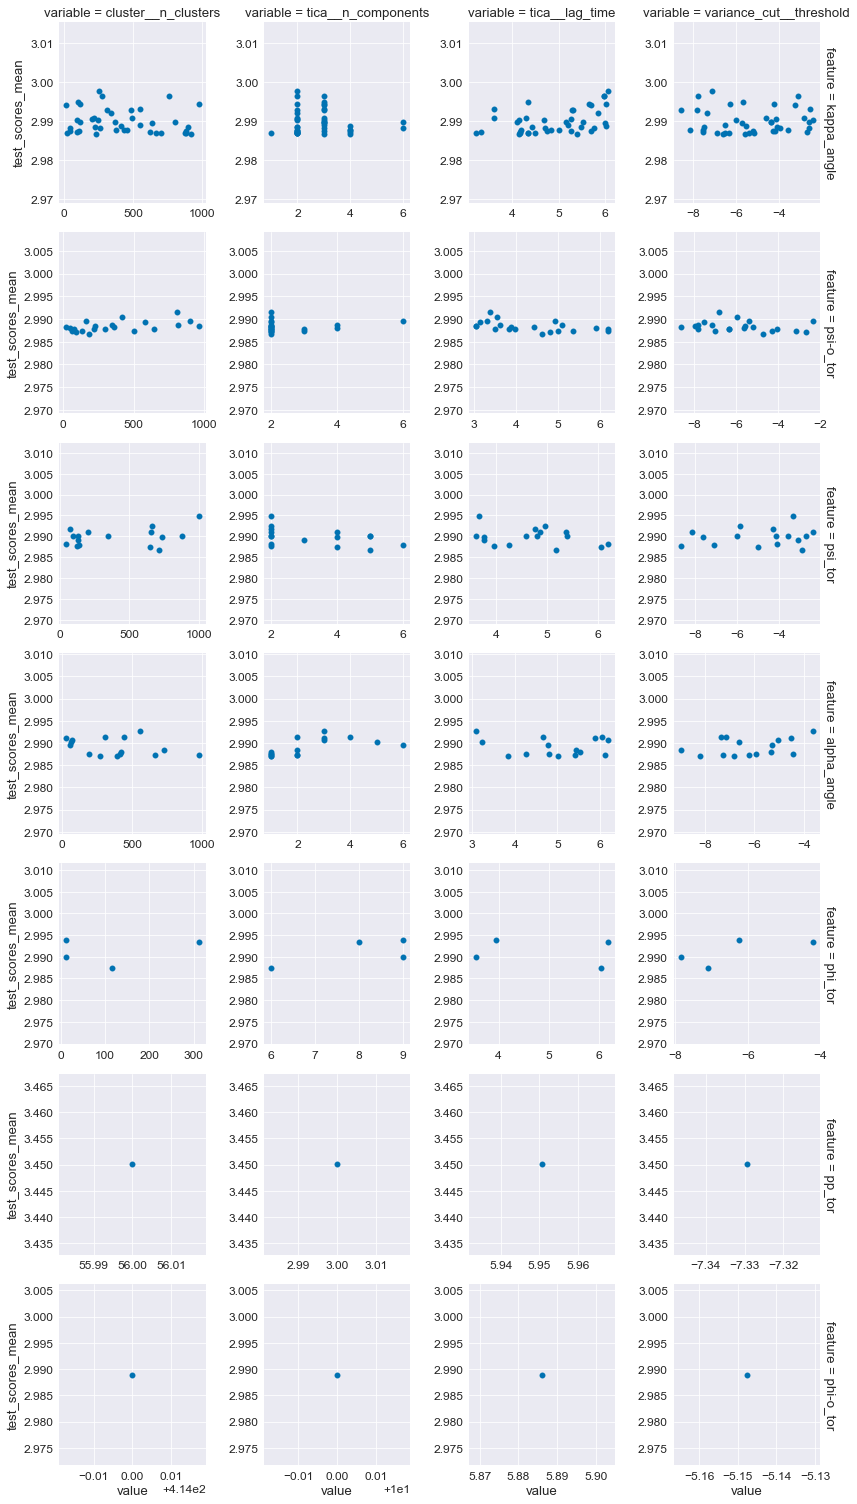

In [30]:
sample = df_melt.loc[(df_melt['rank']< 100) & (df_melt['strategy']=='fixed'), :]
sizes = sample.groupby('feature').size()
feature_order = sizes.index[np.argsort(sizes)][::-1]

with sns.plotting_context('paper', font_scale=1.5):
    sns.set_palette('colorblind')
    g = sns.FacetGrid(sample, row='feature', col='variable', sharey=False, sharex=False, margin_titles=True, 
                     row_order=feature_order)
    g = g.map(plt.scatter,'value', 'test_scores_mean')
plt.tight_layout()

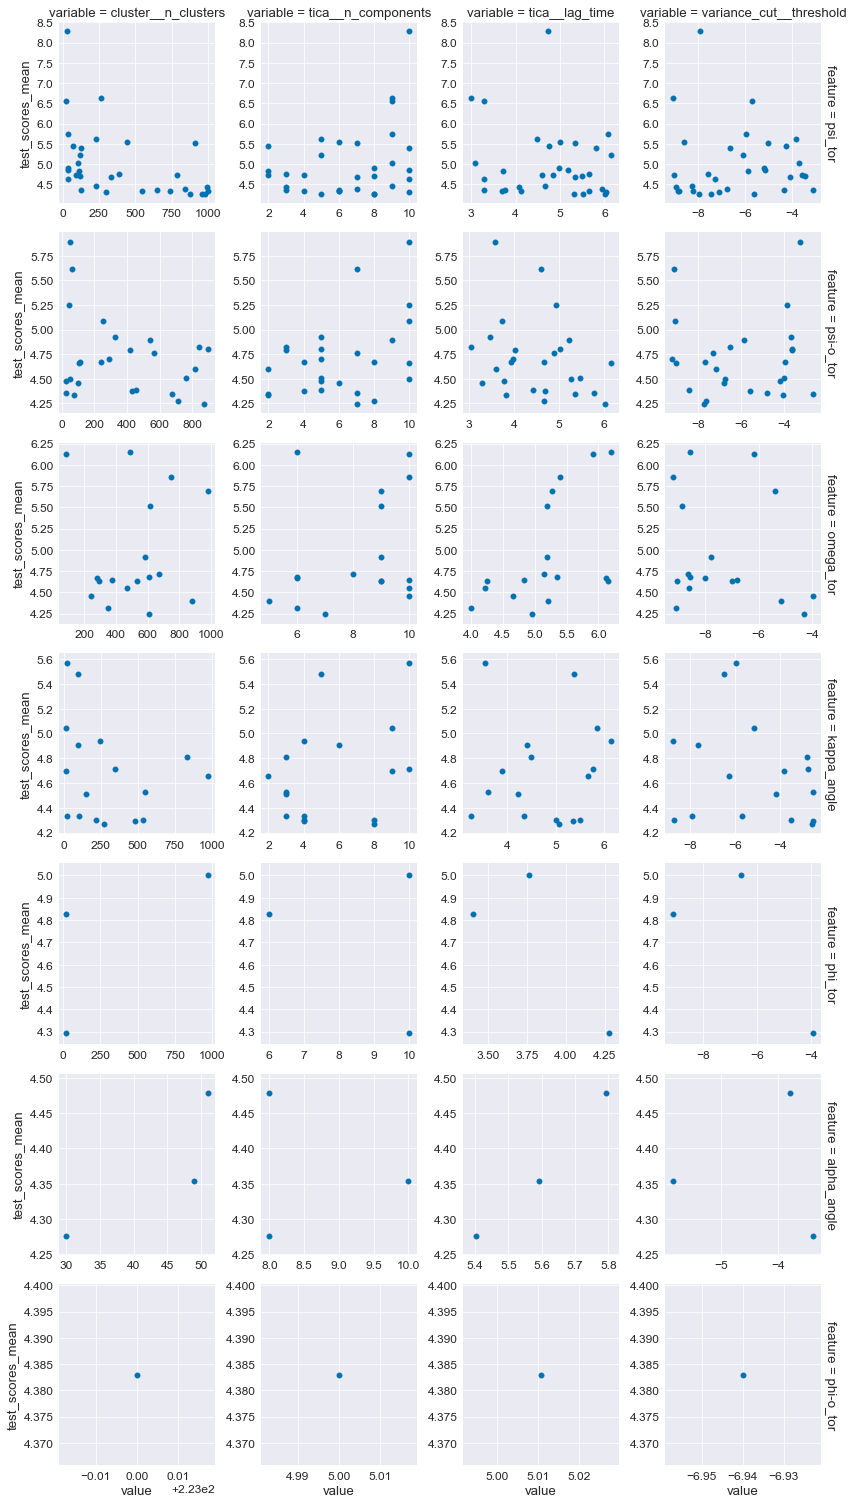

In [31]:
sample = df_melt.loc[(df_melt['rank']< 100) & (df_melt['strategy']=='csp'), :]
sizes = sample.groupby('feature').size()
feature_order = sizes.index[np.argsort(sizes)][::-1]

with sns.plotting_context('paper', font_scale=1.5):
    sns.set_palette('colorblind')
    g = sns.FacetGrid(sample, row='feature', col='variable', sharey=False, sharex=False, margin_titles=True, 
                     row_order=feature_order)
    g = g.map(plt.scatter,'value', 'test_scores_mean')
plt.tight_layout()